# Magnetic Domains Soft Test

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray

In [8]:
filename = 'week8E2BtoF/110.png'

In [9]:
def to_binary(img, lower, upper):
    """This functions converts gray-scaled images to Binary by binning the gray pixel values."""
    return (lower < img) & (img < upper)

In [34]:
def getm(filename, background = 0, pics = True, low = 0, high = 1, i = 0, z =10000):
    """This function takes in a .png, crops the image, converts to binary, and obtains a magntization values"""
    
    img = plt.imread(filename)[i:i+z,i:i+z] #Reads file and crops it. 1536x2048 images
    img1 = rgb2gray(img) #converts the RGB image to Gray
    
    # Below is'nt really background subtraction but, makes finding the low argument
    #for the binary function easy
    if background !=0:
        bimg = plt.imread(background)[i:i+z,i:i+z]
        bimg1 = rgb2gray(bimg) 
        img2 = to_binary(img1 - bimg1,low,high) #Shifts original grayscale downwards then converts to binary
    else:
        img2 = to_binary(img1,low,high) #Converts to binary
    
    Light = np.sum(img2) #calculates the Light area as the sum of the binary images
    Dark = np.size(img2) - Light
    m =(Dark-Light)/(Dark+Light) # Is the magnetization value
    
    if pics != True: #If the image should be outputted or not
        return Dark, Light, m
    else:
        return Dark, Light, m, img, img1,img2


# Figuring out Color bins:

We want Light to be yellow in this case. Check out the equation (1)

In [5]:
filename = 'week8E2FtoB/0.png'
background = 'week8E2FtoB/140.png'

In [6]:
Light_arr = []
for x in range(101):
    Dark, Light, m, img, img1,img2 = getm(filename,background, low = x/100, high = x/100 +.01)
    Light_arr.append(Light/(Light+Dark))
Light_arr = np.array(Light_arr)

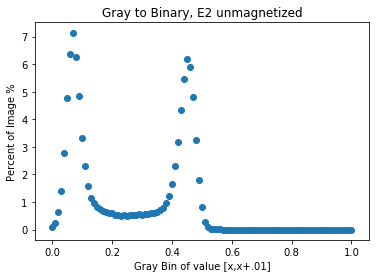

In [7]:
x = np.linspace(0,100, num = 101)
plt.scatter(x/100, Light_arr*100)
plt.title('Gray to Binary, E2 unmagnetized')
plt.xlabel('Gray Bin of value [x,x+.01]')
plt.ylabel('Percent of Image %')
plt.show()

For the $I = 70 \mathrm{A}$ image in E2.

In [26]:
filename = 'week8E2FtoB/70.png'

In [27]:
Light_arr = []
for x in range(101):
    Dark, Light, m, img, img1,img2 = getm(filename,background, low = x/100, high = x/100 +.01)
    Light_arr.append(Light/(Light+Dark))
Light_arr = np.array(Light_arr)

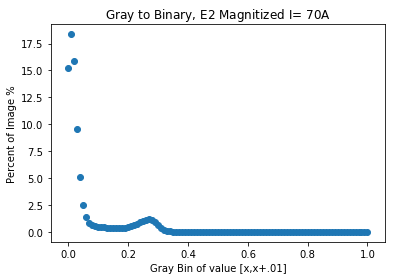

In [28]:
x = np.linspace(0,100, num = 101)
plt.scatter(x/100, Light_arr*100)
plt.title('Gray to Binary, E2 Magnitized I= 70$\mathrm{A}$')
plt.xlabel('Gray Bin of value [x,x+.01]')
plt.ylabel('Percent of Image %')
plt.show()

Unlike in the Hard test there was a shift in color which is why we went with .2 instead of .4

## Checking out the bin range from .2 to 1

The image we obtain were $1536 \times 2048$. The following zooms in on one photo and goes through the steps in the funtion getm

In [38]:
fn = 'week8E2FtoB/0.png'
background = 'week8E2FtoB/140.png'

In [39]:
x = .2
start = 70
Dark, Light, m, img, img1,img2 = getm(fn,background, low = x, high = 1, i = start, z = 1536-start )

In [40]:
error = m

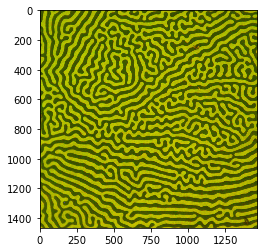

In [41]:
plt.imshow(img)
plt.show()

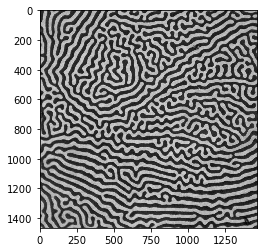

In [42]:
plt.imshow(img1)
plt.gray()
plt.show()

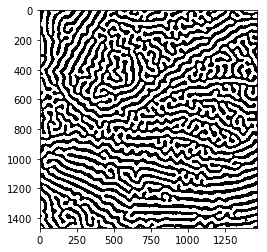

In [43]:
plt.imshow(img2)
plt.show()

## Getting the Hysterisis

The following reads our measurement data and saves it to arrays I and m_arr. We then plot the I and m_arr

In [16]:
x = .2
m_arr = []
I = []
start = 70

for y in range(15):
    Dark, Light, m, img, img1,img2 = getm('week8E2FtoB/%d.png' %((y)*10), \
                                          background, low = x, high = 1, i = start, z = 1536-start)
    m_arr.append(m)
    I.append(10*y)

for y in range(13):
    Dark, Light, m, img, img1,img2 = getm('week8E2FtoB/%d.png' % (-140 + (y+1)*10), \
                                          background, low = x, high = 1,i = start, z = 1536-start)
    m_arr.append(m)
    I.append(140 - 10*(y+1))

Dark, Light, m, img, img1,img2 = getm('week8E2FtoB/-0.png', background, low = x, high = 1 ,i = start, z = 1536-start)
I.append(0)
m_arr.append(m)

In [17]:
for y in range(15):
    Dark, Light, m, img, img1,img2 = getm('week8E2BtoF/%d.png' %((y)*10),\
                                          background, low = x, high = 1, i = start, z = 1536-start)
    m_arr.append(m)
    I.append(-10*y)

for y in range(13):
    Dark, Light, m, img, img1,img2 = getm('week8E2BtoF/%d.png' % (-140 + (y+1)*10),\
                                          background, low = x, high = 1,i = start, z = 1536-start)
    m_arr.append(m)
    I.append(-140 + 10*(y+1))

Dark, Light, m, img, img1,img2 = getm('week8E2BtoF/-0.png', background, low = x, high = 1, i = start, z = 1536-start)
I.append(0)
m_arr.append(m)

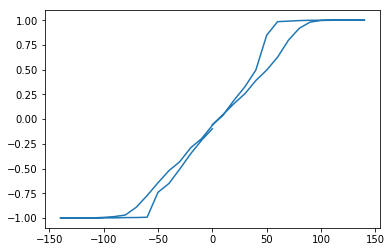

In [18]:
plt.plot(I, m_arr)
plt.savefig('E2Results.png')
plt.show()


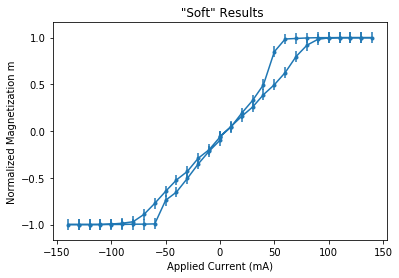

In [32]:
#plt.plot(I, m_arr)
plt.scatter(I, m_arr, marker = '.')
plt.errorbar(I, m_arr, yerr = error,)

plt.title(' "Soft" Results')
plt.xlabel('Applied Current (mA)')
plt.ylabel('Normalized Magnetization m')
plt.savefig('E2Results.png')
plt.show()

$\textit{A little bit of Art:}$

In [44]:
Dark, Light, m, img, img1,img2 = getm('week8E2BtoF/-50.png', background, low = x, high = 1 ,i = start, z = 1536-start)


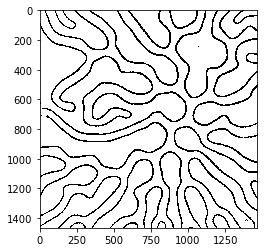

In [45]:
plt.imshow(img2)
plt.show()

In [88]:
fn = 'week8E2FtoB/0.png'
fn1 = 'week8E2FtoB/40.png'
fn2 = 'week8E2FtoB/140.png'
fn3 = 'week8E2FtoB/-40.png'
fn4 = 'week8E2FtoB/-0.png'
fn5 = 'week8E2BtoF/40.png'
fn6 = 'week8E2BtoF/140.png'
fn7 = 'week8E2BtoF/-40.png'
fn8 = 'week8E2BtoF/0.png'

In [89]:
img = plt.imread(fn)
img1 = plt.imread(fn1)
img2 = plt.imread(fn2)
img3 = plt.imread(fn3)
img4 = plt.imread(fn4)
img5 = plt.imread(fn5)
img6 = plt.imread(fn6)
img7 = plt.imread(fn7)
img8 = plt.imread(fn8)

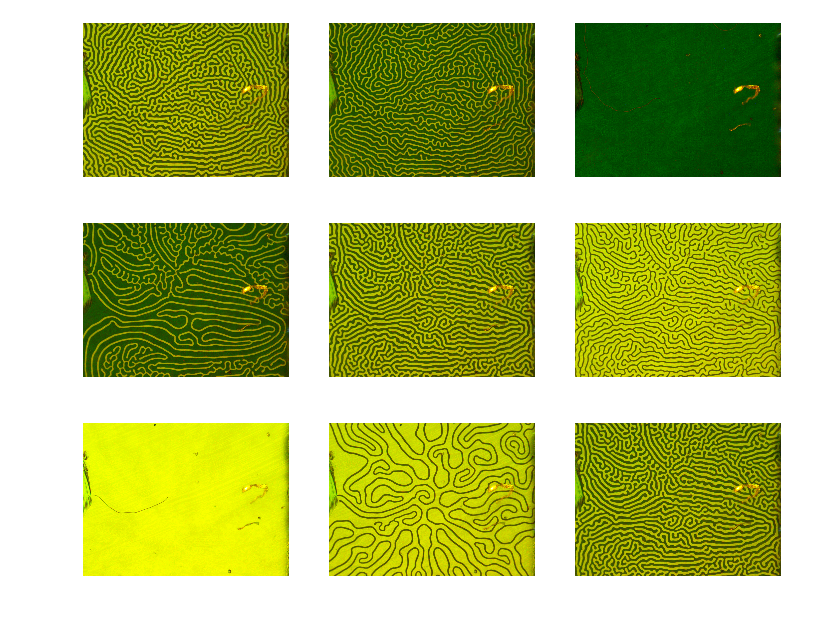

In [90]:
f1 = plt.figure(num='something',figsize = (6,5), dpi =150)

plt.subplot(3,3,1)
plt.axis('off')
plt.imshow(img)

plt.subplot(3,3,2)
plt.axis('off')
plt.imshow(img1)

plt.subplot(3,3,3)
plt.axis('off')
plt.imshow(img2)

plt.subplot(3,3,4)
plt.axis('off')
plt.imshow(img3)

plt.subplot(3,3,5)
plt.axis('off')
plt.imshow(img4)

plt.subplot(3,3,6)
plt.axis('off')
plt.imshow(img5)

plt.subplot(3,3,7)
plt.axis('off')
plt.imshow(img6)

plt.subplot(3,3,8)
plt.axis('off')
plt.imshow(img7)

plt.subplot(3,3,9)
plt.axis('off')
plt.imshow(img8,)
plt.savefig('E2ALL.png')
plt.show()